In [3]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [4]:
f_path = '/Users/jeongsarah/Desktop/Cording Study/Python/Bit_Study/Machine Learning_Scikit-Learn/자연어처리/'
data_set = utils.get_file(fname=f_path + 'imdb.tar.gz',
                          origin='http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
                          extract=True, cache_subdir='datasets',
                         cache_dir = f_path)

84131840/84125825 [==============================] - 18s 0us/step


##### 필요한 함수

In [14]:
def directory_data(directory) : 
    data = {} # 데이터를 긁어올 빈 딕셔너리 생성
    data['review'] =[] # review 라는 키로 빈 리스트 하나 생성
    for file_path in os.listdir(directory): #  폴더 안에 있는 파일들을 리스트로 만들어준다 
        with open(os.path.join(directory, file_path), 'r', encoding='utf-8') as file:
            data['review'].append(file.read())
        #'r' : read mode. 읽어들이는 것
        
    return pd.DataFrame.from_dict(data)

# 파일을 읽어와서 리스트로 만든 다음 그것을 딕셔너리로 전환 .. ?

In [15]:
# 딕셔너리를 
# 실제 데이터를 만드는 함수
# 긍정, 부정을 만들고 각각의 데이터 프레임에 센티멘스 라는 프레임을 만들어 값을 지정해준다 

def data(directory):
    pos_df = directory_data(os.path.join(directory, 'pos')) 
    neg_df = directory_data(os.path.join(directory, 'neg')) 
    pos_df['sentiment'] = 1
    neg_df['sentiment'] = 0
    
    return pd.concat([pos_df, neg_df])

In [21]:
# 이제 학습용 데이터 프레임 생성
train_df = data(os.path.join(f_path, 'datasets', 'aclImdb', 'train'))
test_df = data(os.path.join(f_path, 'datasets', 'aclImdb', 'test'))

In [22]:
print(train_df.head())

                                              review  sentiment
0  For a movie that gets no respect there sure ar...          1
1  Bizarre horror movie filled with famous faces ...          1
2  A solid, if unremarkable film. Matthau, as Ein...          1
3  It's a strange feeling to sit alone in a theat...          1
4  You probably all already know this by now, but...          1


In [23]:
print(test_df.tail())

                                                  review  sentiment
12495  With actors like Depardieu and Richard it is r...          0
12496  If you like to get a couple of fleeting glimps...          0
12497  When something can be anything you want it to ...          0
12498  I had heard good things about "States of Grace...          0
12499  Well, this movie actually did have one redeemi...          0


In [26]:
reviews = list(train_df['review'])

In [27]:
tokenized_reviews = [r.split() for r in reviews]

In [28]:
print(tokenized_reviews[0])

['For', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem.', 'Imagine', 'a', 'movie', 'where', 'Joe', 'Piscopo', 'is', 'actually', 'funny!', 'Maureen', 'Stapleton', 'is', 'a', 'scene', 'stealer.', 'The', 'Moroni', 'character', 'is', 'an', 'absolute', 'scream.', 'Watch', 'for', 'Alan', '"The', 'Skipper"', 'Hale', 'jr.', 'as', 'a', 'police', 'Sgt.']


In [29]:
review_len_by_token = [len(t) for t in tokenized_reviews]

In [30]:
print(review_len_by_token[0])

52


In [31]:
print(len(review_len_by_token))

25000


- 이제까지는 단어의 길이
- 이제부터는 음절의 길이

In [35]:
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

In [38]:
print(len(review_len_by_eumjeol))

25000


In [39]:
print(review_len_by_eumjeol[0])

233


In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(review_len_by_token, bins=50, alpha=0.5, color = 'r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color = 'b', label='alphabet')
plt.yscale('log', nonpositive='clip')
plt.title('Reveiw Length Histogram')
plt.legend(['word', 'character'])
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

ValueError: provided too many kwargs, can only pass {'basex', 'subsx', nonposx'} or {'basey', 'subsy', nonposy'}.  You passed {'nonpositive': 'clip'}

In [44]:
import numpy as np

print('문자 최대길이: {}'.format(np.max(review_len_by-token)))
print('문자 최대길이: {}'.format(np.min(review_len_by-token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 1사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

NameError: name 'review_len_by' is not defined

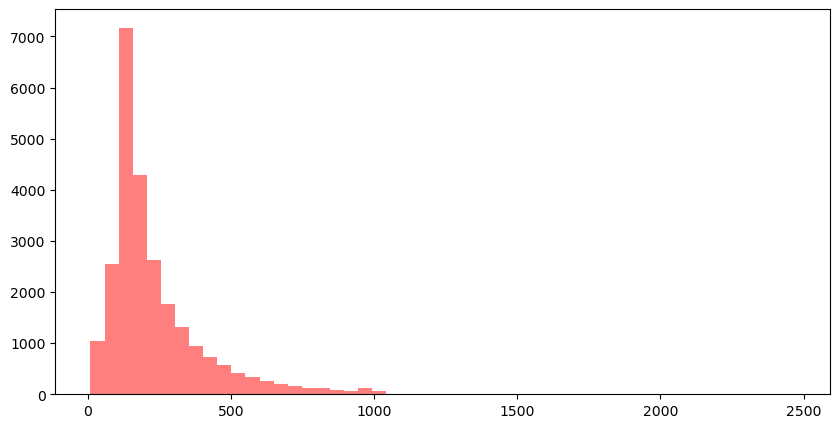

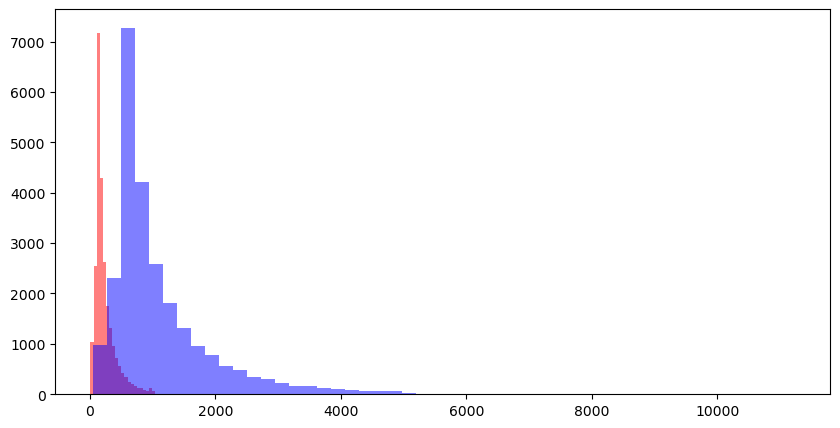

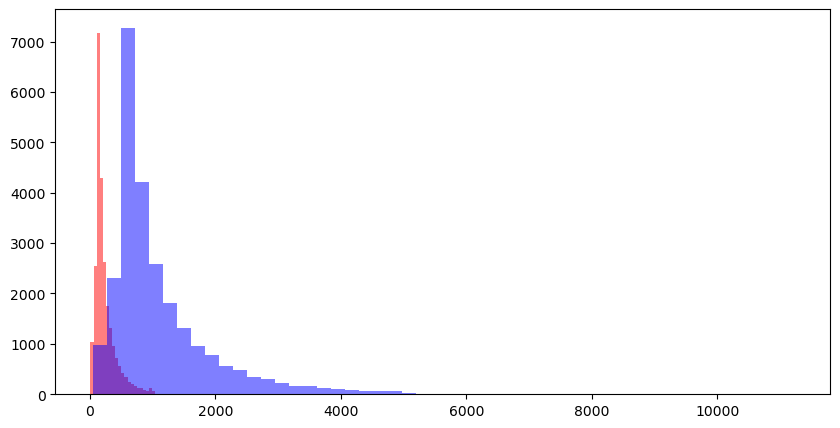

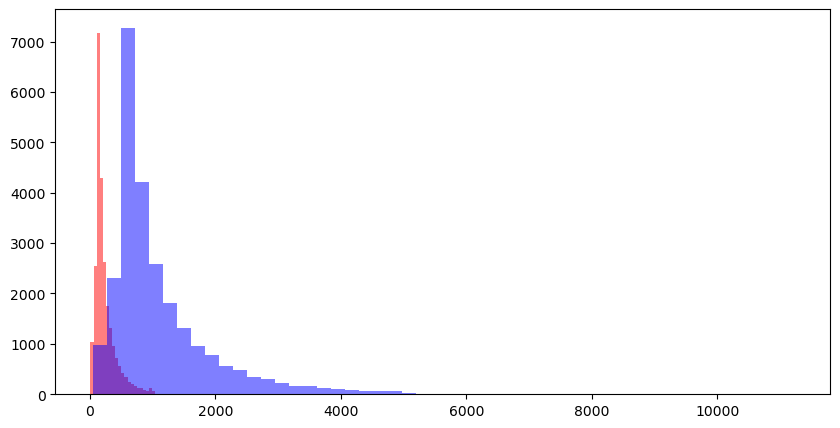

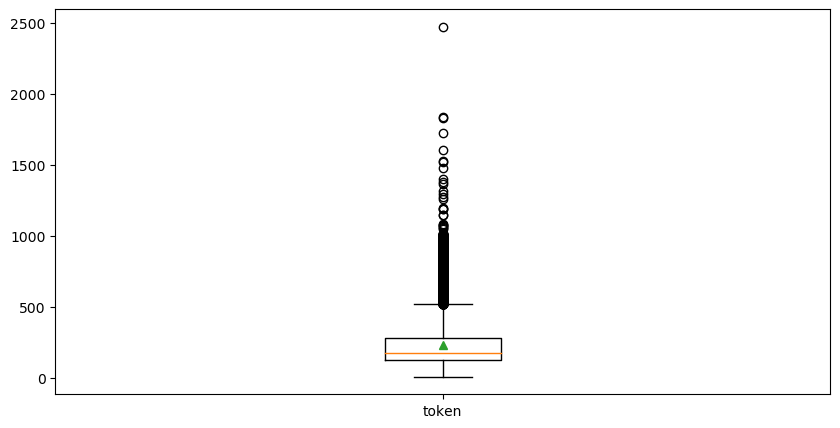

In [45]:
plt.figure(figsize=(10,5))
plt.boxplot([review_len_by_token], labels=['token'], showmeans=True)
plt.show()

In [46]:
plt.figure(figsize=(10,5))
plt.boxplot([review_len_by_eumjeol], labels=['eumjeol'], showmeans=True)
# 이상치가 심하면 데이터의 범위가 너무 넓어 학습이 효율적으로 이루어지지 않는다 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcae18eb5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcae18ebc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcae18eb198>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcae18ebf28>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcae1a539b0>],
 'means': [<matplotlib.lines.Line2D at 0x7fcae1a53668>]}

In [48]:
from wordcloud import WordCloud, STOPWORDS

worldcloud = WordCloud(stopwords=STOPWORDS,
                      background_color = 'black',
                      width=800, height=600).generate(' '.join(train_df['review']))

plt.figure(figsize=(13, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# 빈도수가 큰 단어들은 크게 보여주고, 빈도수가 적은 단어들은 작게 보여준다. 

NameError: name 'wordcloud' is not defined

In [49]:
sentiment = train_df['sentiment'].value_counts()
print(sentiment)

1    12500
0    12500
Name: sentiment, dtype: int64


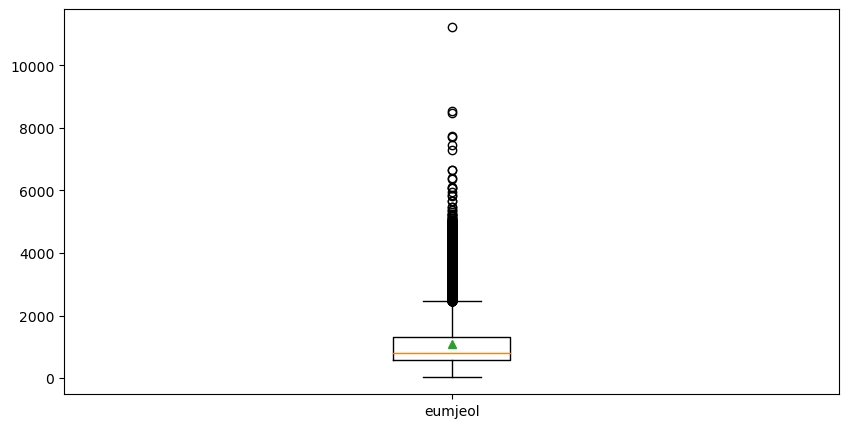

<Figure size 1300x800 with 0 Axes>

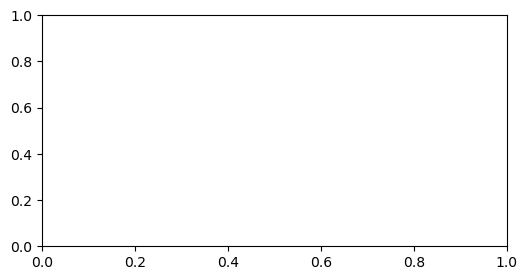

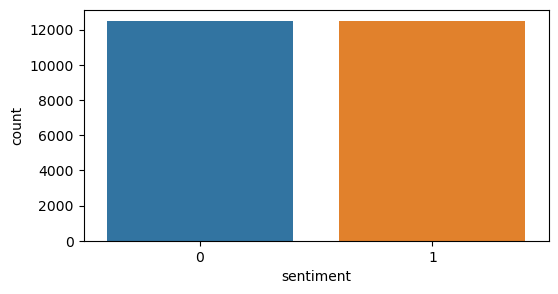

In [52]:
import seaborn as sns

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(x=train_df['sentiment'])
plt.show()